In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 4 == 0:
                line = ast.literal_eval(line)
                test_val_accumulator.append(line[-1])
    
#     print("\ntest_val_accumulator: ", test_val_accumulator)
    return test_val_accumulator

In [3]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 4 == 0:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    sparsity_accumulator.append(0)
                else:
                    sparsity_accumulator.append(sparsity_list[-1])
                
    
    
    for i, element in enumerate(sparsity_accumulator):
        if not 0 <= element <= 1:
            print(f"{i}-th element: error")
            sparsity_accumulator[i] = 0
    
#     print("\nsparsity_accumulator: ", sparsity_accumulator)
    return sparsity_accumulator

In [4]:
def selectivity_val_extractor(file_name):
    selectivity_average_accumulator = list()
    selectivity_std_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 5 == 0:
                selectivity_average = ast.literal_eval(line)
                selectivity_average_accumulator.append(selectivity_average)
            if (i - 3) % 5 == 0:
                selectivity_std = ast.literal_eval(line)
                selectivity_std_accumulator.append(selectivity_std)
    
#     print("\nselectivity_average_accumulator: ", selectivity_average_accumulator)
#     print("\nselectivity_std_accumulator: ", selectivity_std_accumulator)
    return selectivity_average_accumulator, selectivity_std_accumulator

In [5]:
def all_plotter(__list__, test_acc_list, sparsity_list, selectivity_average_list, selectivity_std_list, location='best'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(__list__, test_acc_list, marker='s', label='test accuracy', c='r')
    ax.plot(__list__, sparsity_list, marker='v', label='sparsity', c='g')
    ax.errorbar(__list__, selectivity_average_list, selectivity_std_list, marker='^', label='selectivity', c='b')
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

In [6]:
hidden_layer_neurons = [64, 128, 256, 384, 512, 768, 1024]

# Graph 

In [7]:
def plotter(optimizer_name, flag=False):
    test_vals  = test_val_extractor(f'neurons_sparsity_{optimizer_name}.txt')
    sparsities = sparsity_val_extractor(f'neurons_sparsity_{optimizer_name}.txt')
    selectivity_average, selectivity_std = selectivity_val_extractor(f"neurons_selectivity_{optimizer_name}.txt")
    
    if flag==False:
        all_plotter(hidden_layer_neurons, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')
    
    if flag==True:
        return hidden_layer_neurons, test_vals, sparsities, selectivity_average, selectivity_std

# Compare

In [8]:
def compare(optimizer_name):
    hidden_layer_neurons, test_vals, sparsities, selectivity_average, selectivity_std = plotter(optimizer_name, flag=True)
    print(f"{optimizer_name} first (64): Test acc={test_vals[0]:.3f}, Spar={sparsities[0]:.3f}, Selec avg={selectivity_average[0]:.3f}, Selec std={selectivity_std[0]:.3f}")
    print(f"{optimizer_name} last(1024): Test acc={test_vals[-1]:.3f}, Spar={sparsities[-1]:.3f}, Selec avg={selectivity_average[-1]:.3f}, Selec std={selectivity_std[-1]:.3f}")
    print()

In [9]:
compare('SGD')
compare('Adadelta')
compare('Adagrad')
compare('Adam')

SGD first (64): Test acc=0.970, Spar=0.250, Selec avg=0.349, Selec std=0.187
SGD last(1024): Test acc=0.966, Spar=0.172, Selec avg=0.289, Selec std=0.133

Adadelta first (64): Test acc=0.976, Spar=0.313, Selec avg=0.376, Selec std=0.175
Adadelta last(1024): Test acc=0.982, Spar=0.401, Selec avg=0.445, Selec std=0.146

Adagrad first (64): Test acc=0.974, Spar=0.469, Selec avg=0.525, Selec std=0.187
Adagrad last(1024): Test acc=0.980, Spar=0.810, Selec avg=0.796, Selec std=0.157

Adam first (64): Test acc=0.975, Spar=0.308, Selec avg=0.372, Selec std=0.155
Adam last(1024): Test acc=0.983, Spar=0.439, Selec avg=0.519, Selec std=0.159



# SGD

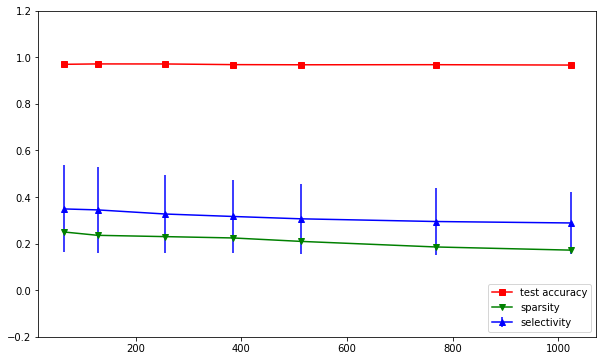

In [10]:
plotter('SGD')

# Adadelta

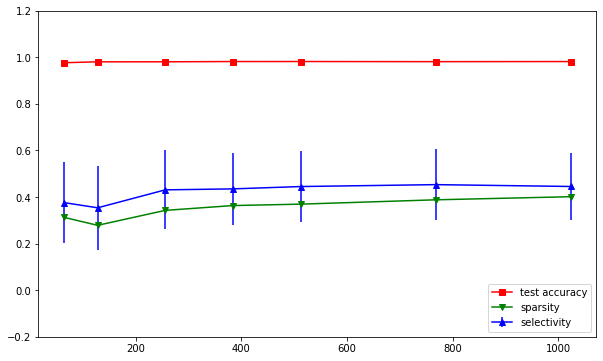

In [11]:
plotter('Adadelta')

# Adagrad

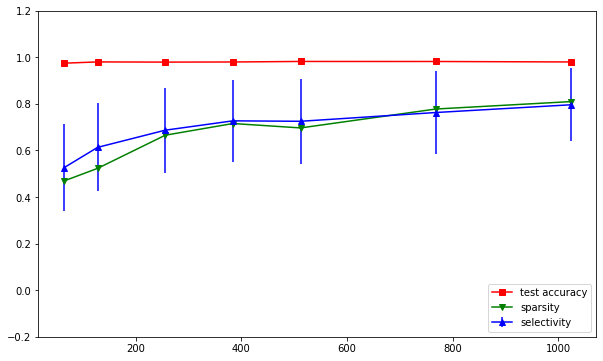

In [12]:
plotter('Adagrad')

# Adam

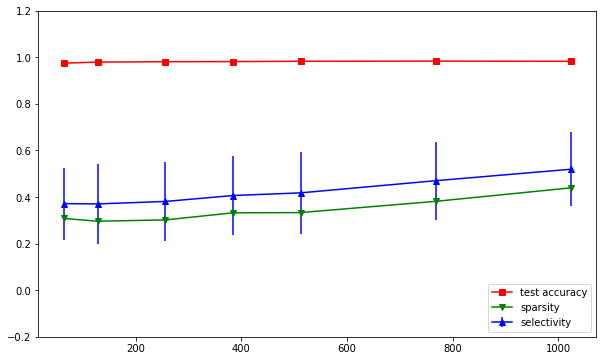

In [13]:
plotter('Adam')